In [46]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

print(np.random.normal(0, 1, 10))
print(np.random.normal(-3, 3, 10))

np.random.seed(0)
x1 = 2 - 3 * np.random.normal(0, 1, 10)
y1 = x1 - 2 * (x1 ** 2) + 0.5 * (x1 ** 3) + np.random.normal(-3, 3, 10)

print(x1)
print(y1)


[ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323  0.33367433
  1.49407907 -0.20515826  0.3130677  -0.85409574]
[-10.65896945  -1.03914421  -0.4066914   -5.22649506   3.80926387
  -7.36309702  -2.86272445  -3.56155155   1.59833764   1.40807631]
[-3.29215704  0.79952837 -0.93621395 -4.7226796  -3.60267397  4.93183364
 -0.85026525  2.45407162  2.30965656  0.76820449]
[ -45.37731171    1.13940516   -3.81638806 -104.63168028  -54.60962435
   14.26534353   -1.12128009   -5.8165549    -4.25972022   -5.74768563]


In [60]:

# transforming the data to include another axis
x = x1[:, np.newaxis]
y = y1[:, np.newaxis]

print(x)
print(y)

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

print(x_poly)


[[-3.29215704]
 [ 0.79952837]
 [-0.93621395]
 [-4.7226796 ]
 [-3.60267397]
 [ 4.93183364]
 [-0.85026525]
 [ 2.45407162]
 [ 2.30965656]
 [ 0.76820449]]
[[ -45.37731171]
 [   1.13940516]
 [  -3.81638806]
 [-104.63168028]
 [ -54.60962435]
 [  14.26534353]
 [  -1.12128009]
 [  -5.8165549 ]
 [  -4.25972022]
 [  -5.74768563]]
[[ 1.         -3.29215704 10.83829796]
 [ 1.          0.79952837  0.63924562]
 [ 1.         -0.93621395  0.87649656]
 [ 1.         -4.7226796  22.30370258]
 [ 1.         -3.60267397 12.97925974]
 [ 1.          4.93183364 24.32298305]
 [ 1.         -0.85026525  0.722951  ]
 [ 1.          2.45407162  6.02246754]
 [ 1.          2.30965656  5.3345134 ]
 [ 1.          0.76820449  0.59013814]]


In [57]:
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

model.coef_

array([[ 0.        ,  9.53625309, -1.72951538]])

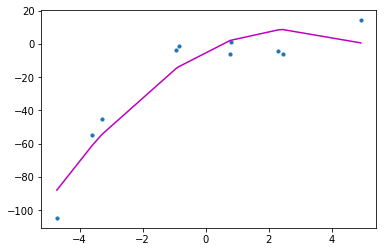

In [58]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()